<a href="https://colab.research.google.com/github/Shivangi-spec/Deepfake-Audio-Detection/blob/main/Deepfake_Audio_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
print(torch.__version__)  # Check installed version
print(torch.cuda.is_available())  # Should return True if GPU is working


2.6.0+cu124
True


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import random

# Define the main folder path where your audio data is stored
main_folder_path = '/home/shivangithakur/Documents/Audio_Data'  # Update this with the correct path

subfolders = ['testing', 'training', 'validation']

# Collect all audio files from fake and real subfolders
audio_files = []
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder_path, subfolder)
    if os.path.exists(subfolder_path):

        fake_folder = os.path.join(subfolder_path, 'fake')
        real_folder = os.path.join(subfolder_path, 'real')

        # Collect all audio files in "fake" and "real" folders
        if os.path.exists(fake_folder):
            fake_files = [os.path.join(fake_folder, f) for f in os.listdir(fake_folder) if f.endswith('.wav')]
            audio_files.extend(fake_files)
        if os.path.exists(real_folder):
            real_files = [os.path.join(real_folder, f) for f in os.listdir(real_folder) if f.endswith('.wav')]
            audio_files.extend(real_files)

random.shuffle(audio_files)

num_files_to_process = int(len(audio_files) * 1)
audio_files_subset = audio_files[:num_files_to_process]

print(f"Found {len(audio_files)} audio files across {len(subfolders)} subfolders.")
print(f"Processing {len(audio_files_subset)} files (100% of the data).")

def extract_audio_features(audio_file):
    try:
        y, sr = librosa.load(audio_file, sr=None)

        # Extract MFCCs (13 coefficients)
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)

        # Extract Chroma features (12 bins)
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)

        # Extract Mel Spectrogram (128 bins)
        mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)

        # Extract Spectral Contrast (7 bins)
        contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr).T, axis=0)

        # Combine features into a single array
        features = np.hstack([mfccs, chroma, mel, contrast])
        return features
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
        return None

# Data list to hold extracted features
data = []

# Iterate through the subset of audio files for feature extraction
for audio_file in audio_files_subset:
    features = extract_audio_features(audio_file)
    if features is not None:
        label = 'fake' if 'fake' in audio_file else 'real'
        data.append([audio_file, label] + list(features))
    else:
        print(f"Skipping {audio_file} due to errors.")

print(f"Extracted features for {len(data)} files")

# Define column names
columns = ['Filename', 'Label'] + [f'MFCC_{i+1}' for i in range(13)] + \
          [f'Chroma_{i+1}' for i in range(12)] + \
          [f'Mel_{i+1}' for i in range(128)] + \
          [f'Contrast_{i+1}' for i in range(7)]

# Create DataFrame from the features
df = pd.DataFrame(data, columns=columns)

# Preview the DataFrame
print(df.head())

# Save the features to a CSV file
output_csv = os.path.join(main_folder_path, 'audio_features.csv')
df.to_csv(output_csv, index=False)
print(f"Features saved to {output_csv}")

Found 17880 audio files across 3 subfolders.
Processing 17880 files (100% of the data).


/home/shivangithakur/anaconda3/envs/demo1/lib/python3.10/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Extracted features for 17880 files
                                            Filename Label      MFCC_1  \
0  /home/shivangithakur/Documents/Audio_Data/trai...  fake -197.747772   
1  /home/shivangithakur/Documents/Audio_Data/trai...  fake -248.802856   
2  /home/shivangithakur/Documents/Audio_Data/trai...  fake -154.543228   
3  /home/shivangithakur/Documents/Audio_Data/trai...  real -225.144943   
4  /home/shivangithakur/Documents/Audio_Data/trai...  fake -199.164688   

       MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6     MFCC_7  \
0   99.068573 -21.575222  32.807243 -34.260090 -22.545443 -23.111786   
1   92.881371  21.044600  28.774639  -3.420280   7.016860   0.336287   
2  104.865593   1.670090  46.966454  -0.434979  -1.321844  -3.082791   
3   63.898354  41.045311   6.161100 -30.002151 -29.137970 -26.133947   
4  165.365921 -40.465130  32.718304 -25.931602  -8.185932  -0.409545   

      MFCC_8  ...   Mel_126       Mel_127       Mel_128  Contrast_1  \
0 -38.307396  ..

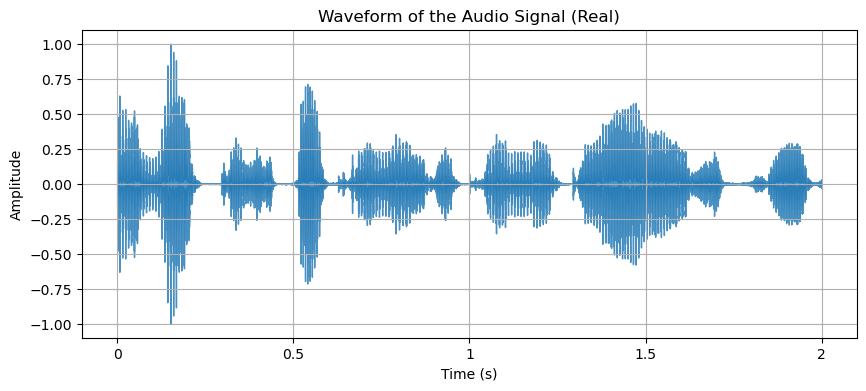

Randomly selected file: /home/shivangithakur/Documents/Audio_Data/testing/real/file147.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
Label: real


In [ ]:
import os
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define paths to the fake and real folders
fake_folder = "/home/shivangithakur/Documents/Audio_Data/testing/fake"
real_folder = "/home/shivangithakur/Documents/Audio_Data/testing/real"

# Check if directories exist
if not os.path.exists(fake_folder) or not os.path.exists(real_folder):
    raise FileNotFoundError("One or both of the specified folders do not exist. Check the paths.")

# Get list of all audio files in both folders
fake_files = [os.path.join(fake_folder, f) for f in os.listdir(fake_folder) if f.endswith(('.wav', '.mp3'))]
real_files = [os.path.join(real_folder, f) for f in os.listdir(real_folder) if f.endswith(('.wav', '.mp3'))]

# Combine files into one list with labels
all_files = fake_files + real_files
labels = ['fake'] * len(fake_files) + ['real'] * len(real_files)

# Ensure there are files to process
if not all_files:
    raise ValueError("No audio files found in the specified directories.")

# Randomly select an audio file and its label
random_index = random.randint(0, len(all_files) - 1)
random_file = all_files[random_index]
label = labels[random_index]

# Load the randomly selected audio file
signal, sr = librosa.load(random_file, sr=None)  # Load the file with its original sampling rate

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal, sr=sr, alpha=0.8)
plt.title(f"Waveform of the Audio Signal ({label.capitalize()})")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

print(f"Randomly selected file: {random_file}")
print(f"Label: {label}")

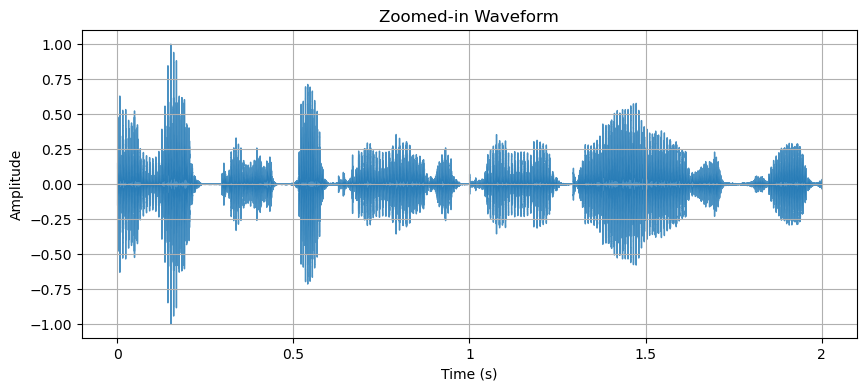

In [ ]:
start_sample = 0
end_sample = sr * 5  # 5 seconds
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal[start_sample:end_sample], sr=sr, alpha=0.8)
plt.title("Zoomed-in Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


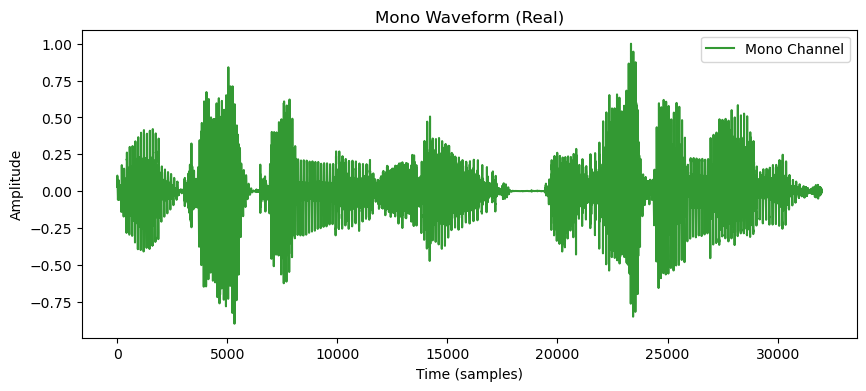

Randomly selected file: /home/shivangithakur/Documents/Audio_Data/testing/real/file1312.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
Label: real
Sampling rate: 16000


In [ ]:
import os
import random
import soundfile as sf
import matplotlib.pyplot as plt

# Define paths to the fake and real folders
fake_folder = "/home/shivangithakur/Documents/Audio_Data/testing/fake"
real_folder = "/home/shivangithakur/Documents/Audio_Data/testing/real"

# Get list of all audio files in both folders
fake_files = [os.path.join(fake_folder, f) for f in os.listdir(fake_folder) if f.endswith(('.wav', '.mp3'))]
real_files = [os.path.join(real_folder, f) for f in os.listdir(real_folder) if f.endswith(('.wav', '.mp3'))]

# Combine files into one list with labels
all_files = fake_files + real_files
labels = ['fake'] * len(fake_files) + ['real'] * len(real_files)

# Randomly select an audio file and its label
random_index = random.randint(0, len(all_files) - 1)
random_file = all_files[random_index]
label = labels[random_index]

# Load the audio file
signal, sr = sf.read(random_file)

# Plot waveform based on audio type (stereo or mono)
if len(signal.shape) == 2:  # Stereo audio
    plt.figure(figsize=(10, 4))
    plt.plot(signal[:, 0], alpha=0.8, label='Left Channel', color='blue')
    plt.plot(signal[:, 1], alpha=0.8, label='Right Channel', color='orange')
    plt.title(f"Stereo Waveform ({label.capitalize()})")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()
else:  # Mono audio
    plt.figure(figsize=(10, 4))
    plt.plot(signal, alpha=0.8, label='Mono Channel', color='green')
    plt.title(f"Mono Waveform ({label.capitalize()})")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

# Print details of the selected audio file
print(f"Randomly selected file: {random_file}")
print(f"Label: {label}")
print(f"Sampling rate: {sr}")



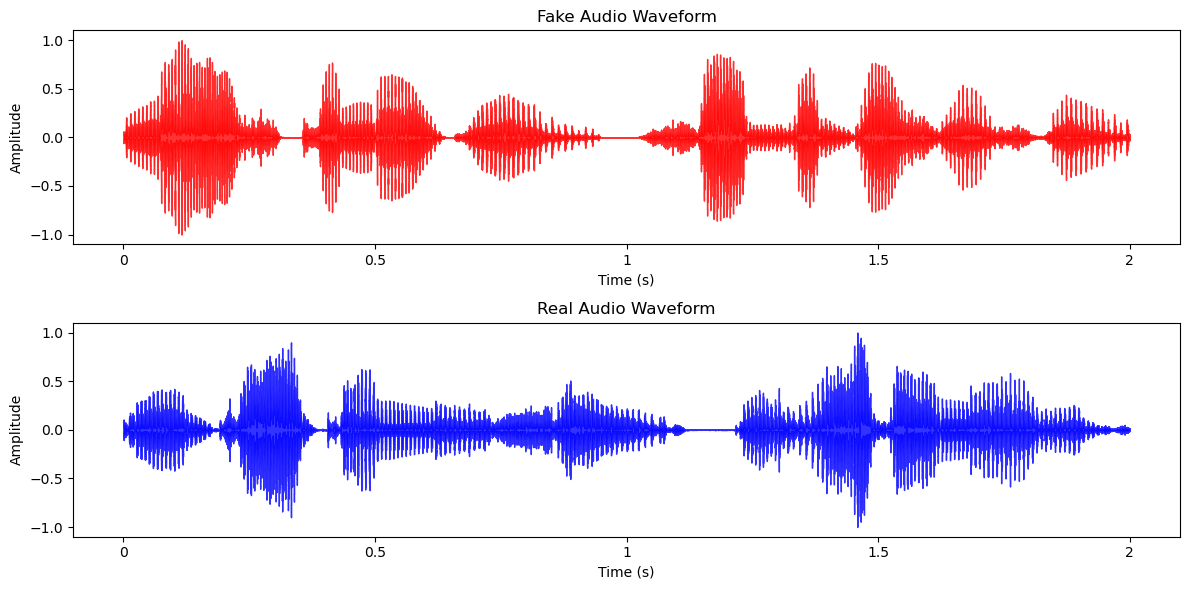

/tmp/ipykernel_1394267/2498019309.py:53: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  fake_spectrogram = librosa.amplitude_to_db(librosa.stft(fake_signal), ref=np.max)
/tmp/ipykernel_1394267/2498019309.py:60: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  real_spectrogram = librosa.amplitude_to_db(librosa.stft(real_signal), ref=np.max)


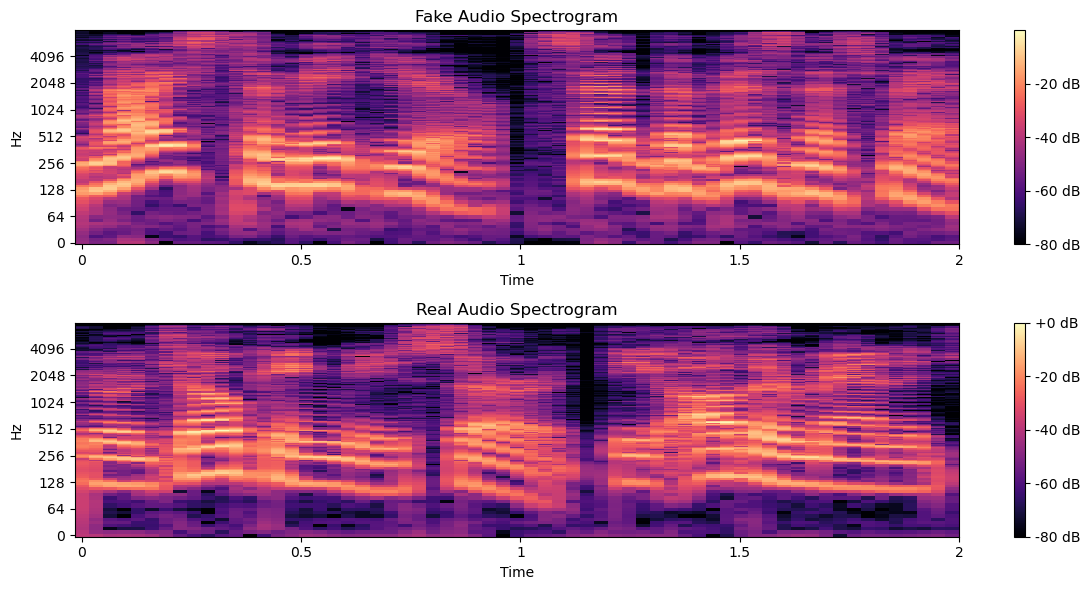

Fake file: /home/shivangithakur/Documents/Audio_Data/testing/fake/file905.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
Real file: /home/shivangithakur/Documents/Audio_Data/testing/real/file1312.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav


In [ ]:
import os
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define paths to fake and real folders
fake_folder = "/home/shivangithakur/Documents/Audio_Data/testing/fake"
real_folder = "/home/shivangithakur/Documents/Audio_Data/testing/real"

# Get list of audio files
fake_files = [os.path.join(fake_folder, f) for f in os.listdir(fake_folder) if f.endswith(('.wav', '.mp3'))]
real_files = [os.path.join(real_folder, f) for f in os.listdir(real_folder) if f.endswith(('.wav', '.mp3'))]

# Randomly select one file from each folder
fake_file = random.choice(fake_files)
real_file = random.choice(real_files)

# Load audio files
fake_signal, fake_sr = librosa.load(fake_file, sr=None)
real_signal, real_sr = librosa.load(real_file, sr=None)

# Ensure both signals have the same length (for fair comparison)
min_length = min(len(fake_signal), len(real_signal))
fake_signal = fake_signal[:min_length]
real_signal = real_signal[:min_length]

# Plot waveforms
plt.figure(figsize=(12, 6))

# Fake waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(fake_signal, sr=fake_sr, alpha=0.8, color="red")
plt.title("Fake Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Real waveform
plt.subplot(2, 1, 2)
librosa.display.waveshow(real_signal, sr=real_sr, alpha=0.8, color="blue")
plt.title("Real Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

# Plot spectrograms
plt.figure(figsize=(12, 6))

# Fake spectrogram
plt.subplot(2, 1, 1)
fake_spectrogram = librosa.amplitude_to_db(librosa.stft(fake_signal), ref=np.max)
librosa.display.specshow(fake_spectrogram, sr=fake_sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Fake Audio Spectrogram")

# Real spectrogram
plt.subplot(2, 1, 2)
real_spectrogram = librosa.amplitude_to_db(librosa.stft(real_signal), ref=np.max)
librosa.display.specshow(real_spectrogram, sr=real_sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Real Audio Spectrogram")

plt.tight_layout()
plt.show()

# Print file details
print(f"Fake file: {fake_file}")
print(f"Real file: {real_file}")


In [ ]:
fake_zcr = librosa.feature.zero_crossing_rate(fake_signal)[0]
real_zcr = librosa.feature.zero_crossing_rate(real_signal)[0]
print("Fake ZCR:", fake_zcr.mean())
print("Real ZCR:", real_zcr.mean())

Fake ZCR: 0.15816437251984128
Real ZCR: 0.12729414682539683


In [ ]:
fake_centroid = librosa.feature.spectral_centroid(y=fake_signal, sr=fake_sr)[0]
real_centroid = librosa.feature.spectral_centroid(y=real_signal, sr=real_sr)[0]

print("Fake Spectral Centroid (Mean):", fake_centroid.mean())
print("Real Spectral Centroid (Mean):", real_centroid.mean())



Fake Spectral Centroid (Mean): 2030.1216767367064
Real Spectral Centroid (Mean): 1808.1293497980882


In [ ]:
fake_mfccs = librosa.feature.mfcc(y=fake_signal, sr=fake_sr, n_mfcc=13)
real_mfccs = librosa.feature.mfcc(y=real_signal, sr=real_sr, n_mfcc=13)

print("Fake MFCCs Shape:", fake_mfccs.shape)
print("Real MFCCs Shape:", real_mfccs.shape)



Fake MFCCs Shape: (13, 63)
Real MFCCs Shape: (13, 63)


Randomly selected file: /home/shivangithakur/Documents/Audio_Data/testing/fake/file507.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav
Label: fake
Loaded audio file with sampling rate: 16000


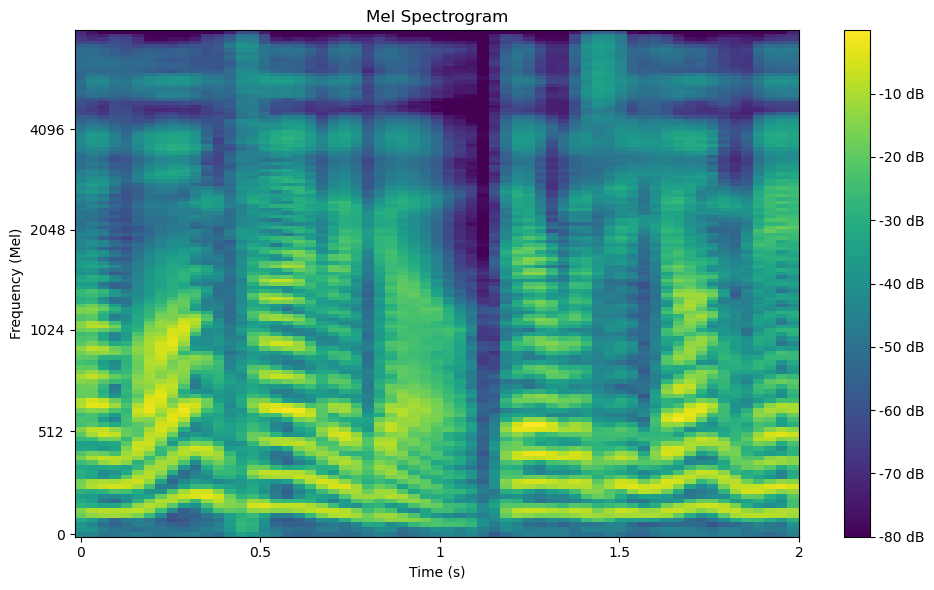

In [ ]:
import os
import random

# Define paths to fake and real folders
fake_folder = "/home/shivangithakur/Documents/Audio_Data/testing/fake"
real_folder = "/home/shivangithakur/Documents/Audio_Data/testing/real"

# Get list of all audio files in both folders
fake_files = [os.path.join(fake_folder, f) for f in os.listdir(fake_folder) if f.endswith(('.wav', '.mp3'))]
real_files = [os.path.join(real_folder, f) for f in os.listdir(real_folder) if f.endswith(('.wav', '.mp3'))]

# Combine files into one list with labels
all_files = fake_files + real_files
labels = ['fake'] * len(fake_files) + ['real'] * len(real_files)

# Pick a random file
random_index = random.randint(0, len(all_files) - 1)
random_file = all_files[random_index]
label = labels[random_index]

print(f"Randomly selected file: {random_file}")
print(f"Label: {label}")

# Load the random audio file
import librosa
signal, sr = librosa.load(random_file, sr=None)
print(f"Loaded audio file with sampling rate: {sr}")

# Compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=2048, hop_length=512, n_mels=128)

# Convert to decibels for better visualization
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Mel)")
plt.tight_layout()
plt.show()


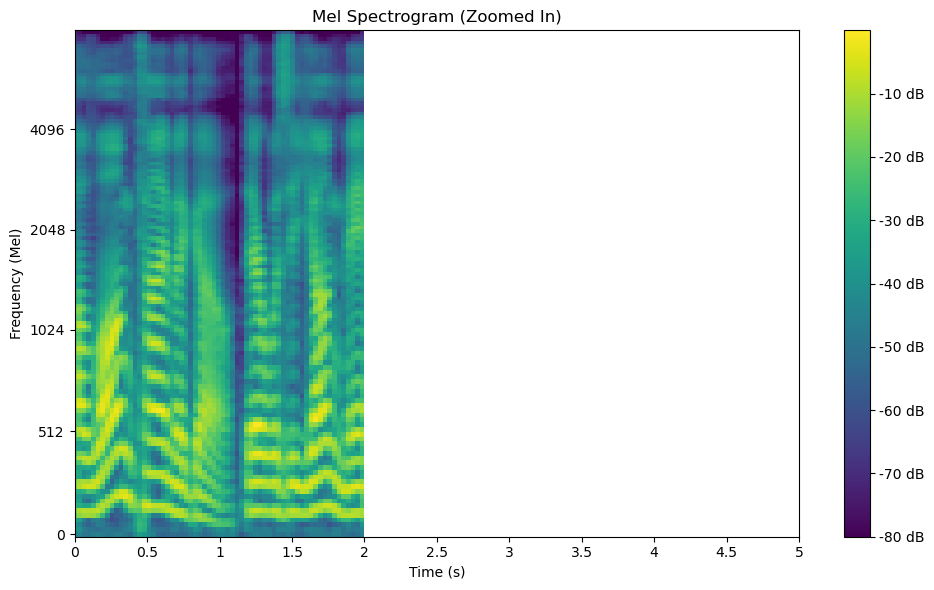

In [ ]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
plt.xlim(0, 5)  # Zoom into the first 5 seconds
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram (Zoomed In)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Mel)")
plt.tight_layout()
plt.show()

In [ ]:
df

,Filename,Label,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,Mel_126,Mel_127,Mel_128,Contrast_1,Contrast_2,Contrast_3,Contrast_4,Contrast_5,Contrast_6,Contrast_7
0,/home/shivangithakur/Documents/Audio_Data/trai...,fake,-197.747772,99.068573,-21.575222,32.807243,-34.260090,-22.545443,-23.111786,-38.307396,...,3.976685e-03,3.084205e-03,1.997402e-04,21.395637,22.351529,27.835808,19.823882,22.797515,27.605487,25.334719
1,/home/shivangithakur/Documents/Audio_Data/trai...,fake,-248.802856,92.881371,21.044600,28.774639,-3.420280,7.016860,0.336287,8.141871,...,1.338953e-05,5.767318e-06,5.763341e-06,17.855753,16.600347,16.402851,19.525627,18.525991,18.296357,28.989935
2,/home/shivangithakur/Documents/Audio_Data/trai...,fake,-154.543228,104.865593,1.670090,46.966454,-0.434979,-1.321844,-3.082791,1.058298,...,3.546906e-06,5.569128e-07,6.261119e-07,20.232773,20.050186,22.285165,19.330062,17.937306,20.657034,33.727940
3,/home/shivangithakur/Documents/Audio_Data/trai...,real,-225.144943,63.898354,41.045311,6.161100,-30.002151,-29.137970,-26.133947,-7.674395,...,6.436712e-01,2.135113e-01,1.026304e-02,26.867435,14.888618,18.353708,18.460358,18.357075,21.715144,27.581297
4,/home/shivangithakur/Documents/Audio_Data/trai...,fake,-199.164688,165.365921,-40.465130,32.718304,-25.931602,-8.185932,-0.409545,-23.364023,...,9.810650e-06,9.727355e-06,9.699305e-06,27.080579,17.565263,20.655487,20.509476,25.404655,38.661050,12.835507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,/home/shivangithakur/Documents/Audio_Data/trai...,fake,-144.570969,90.902863,-27.645227,35.215984,-24.570045,7.789366,-31.084438,-15.353842,...,6.259121e-05,4.761214e-05,4.744856e-05,27.007679,19.613297,21.534440,16.691761,19.827243,25.485505,31.206145
17876,/home/shivangithakur/Documents/Audio_Data/trai...,fake,-181.953552,72.150703,21.300518,65.015602,10.903407,10.199035,-15.432431,6.806511,...,6.442209e-05,1.700702e-06,1.692887e-06,19.141777,18.799396,22.007077,16.277416,18.409598,18.567886,34.828058
17877,/home/shivangithakur/Documents/Audio_Data/trai...,real,-217.208588,83.305084,-1.327825,-1.244699,-27.276085,-17.358360,-26.272722,-23.714277,...,6.220035e-01,2.883020e-01,1.890203e-02,24.314640,18.621152,18.944666,18.564274,19.186314,21.176876,26.506403
17878,/home/shivangithakur/Documents/Audio_Data/trai...,fake,-246.936005,147.976868,-29.164249,2.194746,-36.575848,-9.756474,-12.805856,-22.876633,...,1.753171e-05,1.740602e-05,1.739707e-05,21.243437,20.878657,21.778903,23.022981,27.921117,35.720268,12.688871


In [ ]:
df.sample()

,Filename,Label,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,Mel_126,Mel_127,Mel_128,Contrast_1,Contrast_2,Contrast_3,Contrast_4,Contrast_5,Contrast_6,Contrast_7
13206,/home/shivangithakur/Documents/Audio_Data/trai...,fake,-191.379364,29.926052,9.677968,4.371001,-21.337515,-10.737409,-18.610146,-9.792105,...,0.191467,0.134455,0.014791,18.506199,20.395989,23.254974,19.118743,21.024365,23.878979,32.427477


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Columns: 162 entries, Filename to Contrast_7
dtypes: float64(160), object(2)
memory usage: 22.1+ MB


In [ ]:
df.describe(include='all')

,Filename,Label,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,Mel_126,Mel_127,Mel_128,Contrast_1,Contrast_2,Contrast_3,Contrast_4,Contrast_5,Contrast_6,Contrast_7
count,17880,17880,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,...,1.788000e+04,1.788000e+04,1.788000e+04,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
unique,17880,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/home/shivangithakur/Documents/Audio_Data/trai...,real,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,8945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-184.871079,93.552929,-5.478567,26.632019,-15.476295,-4.649166,-15.503461,-11.023999,...,2.412850e-01,1.256350e-01,9.372095e-03,22.890893,18.469169,20.882451,18.590968,19.829419,23.284988,27.708788
std,NaN,NaN,46.728625,30.738284,19.518233,18.294508,16.201693,14.305528,11.702075,11.865150,...,7.557807e-01,4.278215e-01,3.514909e-02,3.717150,2.449776,2.377029,2.083171,3.015960,5.473248,6.496779
min,NaN,NaN,-494.725128,-22.208818,-103.799103,-32.001240,-63.337547,-53.284248,-57.459385,-47.988808,...,1.099900e-07,5.243287e-08,4.623707e-08,11.055051,9.183971,11.602238,12.291395,12.634974,12.689543,10.330675
25%,NaN,NaN,-214.117180,72.493132,-19.314909,13.542360,-27.586033,-14.489277,-24.198712,-19.790074,...,3.109426e-05,1.591561e-05,1.127734e-05,20.255716,16.794194,19.274215,17.092678,18.044060,19.468717,25.988109
50%,NaN,NaN,-181.231270,90.745670,-4.112848,27.145957,-16.501412,-2.630359,-15.519523,-10.632355,...,6.216169e-03,1.426803e-03,1.074361e-04,22.531859,18.496194,20.750850,18.396398,19.162719,22.207352,29.264972
75%,NaN,NaN,-151.863873,112.232746,8.239401,39.794384,-3.050309,5.683442,-7.422522,-2.783207,...,9.956242e-02,4.785235e-02,3.663421e-03,25.268075,20.120431,22.424865,19.832079,20.448447,24.652991,32.014323


In [ ]:
df.shape

(17880, 162)

In [ ]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 0


In [ ]:
df.value_counts("Label")

Label
real    8945
fake    8935
Name: count, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

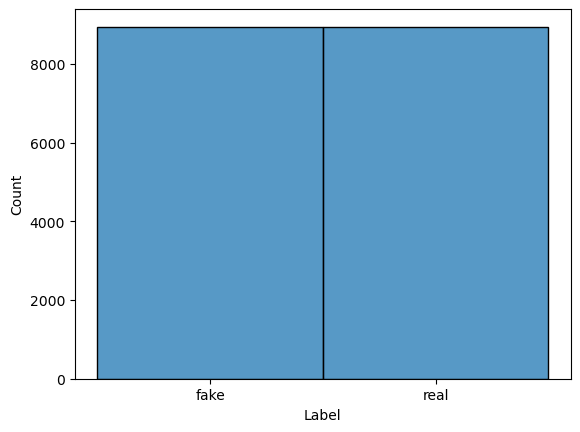

In [ ]:
sns.histplot(df['Label'])
plt.show()

In [ ]:
!pip install scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
file_path = "/home/shivangithakur/Documents/Audio_Data/audio_features.csv"
data = pd.read_csv(file_path)

In [ ]:
# Basic EDA
print("Dataset Shape:", data.shape)
print("Columns:", data.columns)


Dataset Shape: (17880, 162)
Columns: Index(['Filename', 'Label', 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5',
       'MFCC_6', 'MFCC_7', 'MFCC_8',
       ...
       'Mel_126', 'Mel_127', 'Mel_128', 'Contrast_1', 'Contrast_2',
       'Contrast_3', 'Contrast_4', 'Contrast_5', 'Contrast_6', 'Contrast_7'],
      dtype='object', length=162)


In [ ]:
## Check for missing values
df.isnull().sum()

Filename      0
Label         0
MFCC_1        0
MFCC_2        0
MFCC_3        0
             ..
Contrast_3    0
Contrast_4    0
Contrast_5    0
Contrast_6    0
Contrast_7    0
Length: 162, dtype: int64

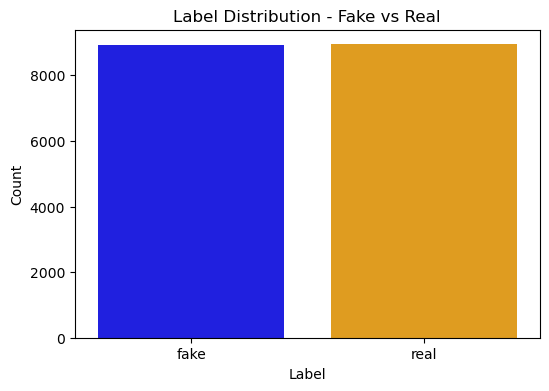

In [ ]:
# Separate the counts for 'fake' and 'real' labels
fake_count = data[data['Label'] == 'fake'].shape[0]
real_count = data[data['Label'] == 'real'].shape[0]

# Create a new DataFrame to display these counts
label_data = pd.DataFrame({
    'Label': ['fake', 'real'],
    'Count': [fake_count, real_count]
})

# Visualize the label distribution with custom colors (blue for 'fake', orange for 'real')
plt.figure(figsize=(6, 4))
sns.barplot(x='Label', y='Count', data=label_data, hue='Label', palette=["blue", "orange"], legend=False)
plt.title("Label Distribution - Fake vs Real")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()



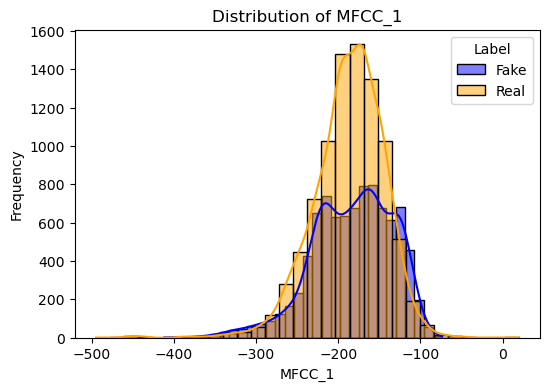

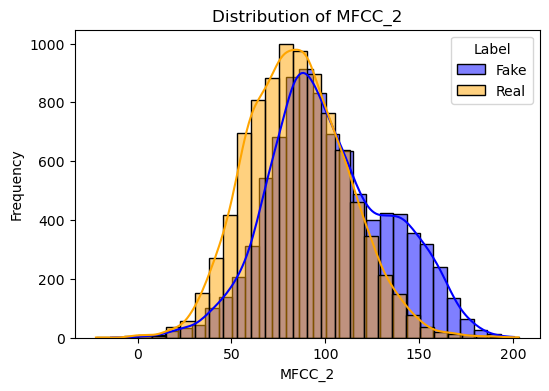

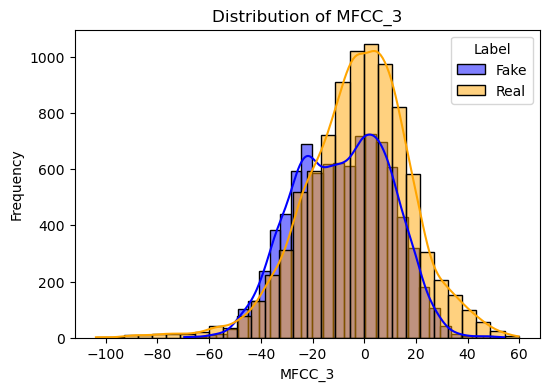

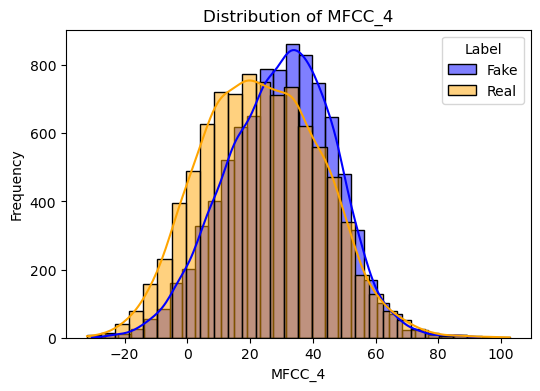

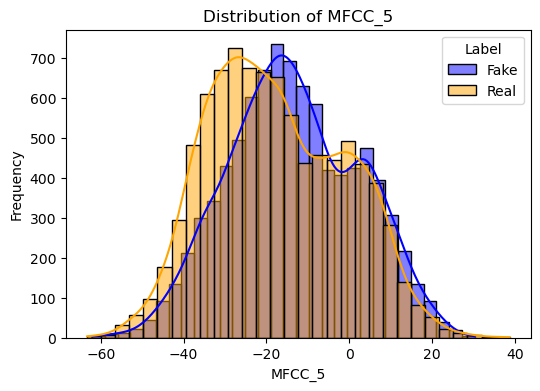

In [ ]:
# Separate the numerical features (excluding 'Filename' and 'Label')
numerical_features = data.drop(columns=["Filename", "Label"])

# Visualize distribution for 'fake' and 'real' labels separately
for col in numerical_features.columns[:5]:
    # For 'fake' label
    plt.figure(figsize=(6, 4))
    sns.histplot(data[data['Label'] == 'fake'][col], kde=True, bins=30, color="blue", label="Fake")

    # For 'real' label
    sns.histplot(data[data['Label'] == 'real'][col], kde=True, bins=30, color="orange", label="Real")

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend(title="Label")
    plt.show()



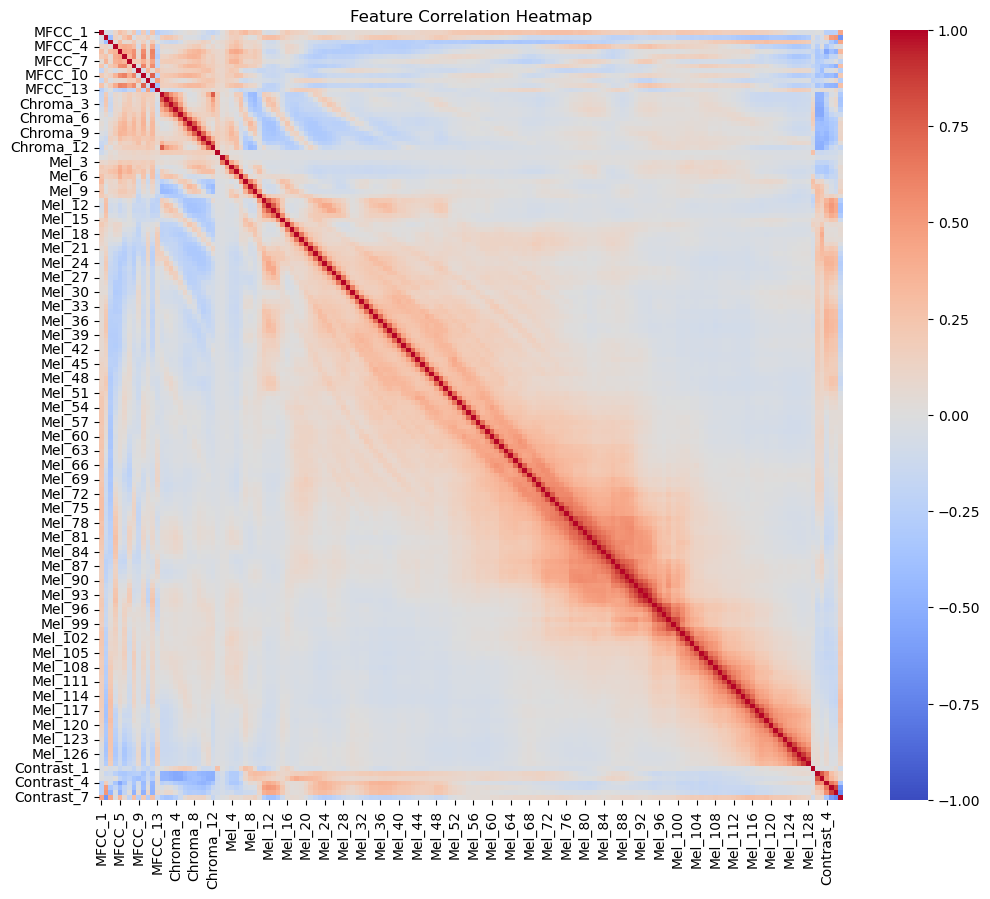

In [ ]:
# Correlation Analysis
corr_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", vmax=1, vmin=-1, center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features.columns)

In [ ]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)  # Keep 95% variance
principal_components = pca.fit_transform(scaled_df)
print("\nPCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of Components:", pca.n_components_)


PCA Explained Variance Ratio: [0.11516192 0.10266158 0.06772473 0.04711342 0.04449522 0.03744895
 0.02894709 0.02507423 0.02206278 0.01987959 0.01932954 0.01765126
 0.01592209 0.01572818 0.01364489 0.01344021 0.01263318 0.01131553
 0.01126408 0.01083733 0.01037304 0.01019841 0.00939253 0.00925427
 0.00875007 0.0085957  0.00828593 0.00805984 0.00797819 0.00760867
 0.00748939 0.00734329 0.00692472 0.00670782 0.00648318 0.0061476
 0.00608547 0.00598438 0.00589641 0.00555518 0.00527246 0.00499225
 0.00488296 0.00468475 0.00444063 0.00434769 0.00426873 0.00418871
 0.00401631 0.00395315 0.00382051 0.00374532 0.00366289 0.00363149
 0.00362091 0.00346382 0.00338943 0.00334755 0.00313145 0.0030634
 0.00299526 0.00296552 0.00281112 0.00275835 0.00272469 0.00268022
 0.00261836 0.00256883 0.00252847 0.00248056 0.0023617  0.0023019
 0.002206   0.00217577 0.00214547 0.00209862 0.00204052 0.00200402
 0.00197034 0.00191869 0.00188095 0.00183702 0.00178388 0.00170514
 0.00166398 0.00164722 0.00162172 

In [ ]:
# Combine PCA features with the target label
pca_df = pd.DataFrame(principal_components, columns=[f"PC_{i+1}" for i in range(pca.n_components_)])
pca_df["Label"] = data["Label"]

In [ ]:
# Save processed dataset
processed_file_path = "processed_audio_features.csv"
pca_df.to_csv(processed_file_path, index=False)
print(f"Processed dataset saved to: {processed_file_path}")

Processed dataset saved to: processed_audio_features.csv


In [ ]:
# Load the processed dataset
processed_data = pd.read_csv("processed_audio_features.csv")

# Display the first few rows of the processed dataset
print(processed_data.head())


        PC_1       PC_2       PC_3      PC_4      PC_5      PC_6      PC_7  \
0  10.877552   8.785247   1.904725  1.194702 -5.243636 -0.558533 -7.332049   
1  -3.329774  -1.196126  -2.770835  0.397791  0.759137 -1.479547 -0.554361   
2   1.802665  -2.198669  -2.370240  1.774058 -1.593909  1.262315  0.590362   
3   0.213562 -10.592213  16.378977 -2.059028  4.546103 -2.506729  0.298838   
4  -1.545284   3.264622  -1.584833  2.799578  0.920447 -1.457504  0.167923   

       PC_8      PC_9     PC_10  ...     PC_82     PC_83     PC_84     PC_85  \
0 -0.474434 -0.354248  4.186488  ... -0.938431  0.017990  0.422760 -0.946065   
1 -0.939842 -1.422618  0.321801  ... -0.230886  0.205083  0.380878 -0.066281   
2 -3.726345 -0.536808 -0.786665  ... -0.059092 -0.614077 -0.014360  0.426981   
3 -5.709093 -1.675069 -0.215666  ... -0.484942  0.789395 -0.318336  0.212505   
4 -0.664687  1.657065  0.418987  ... -0.153387 -0.357946 -0.149313 -0.226712   

      PC_86     PC_87     PC_88     PC_89     PC_9

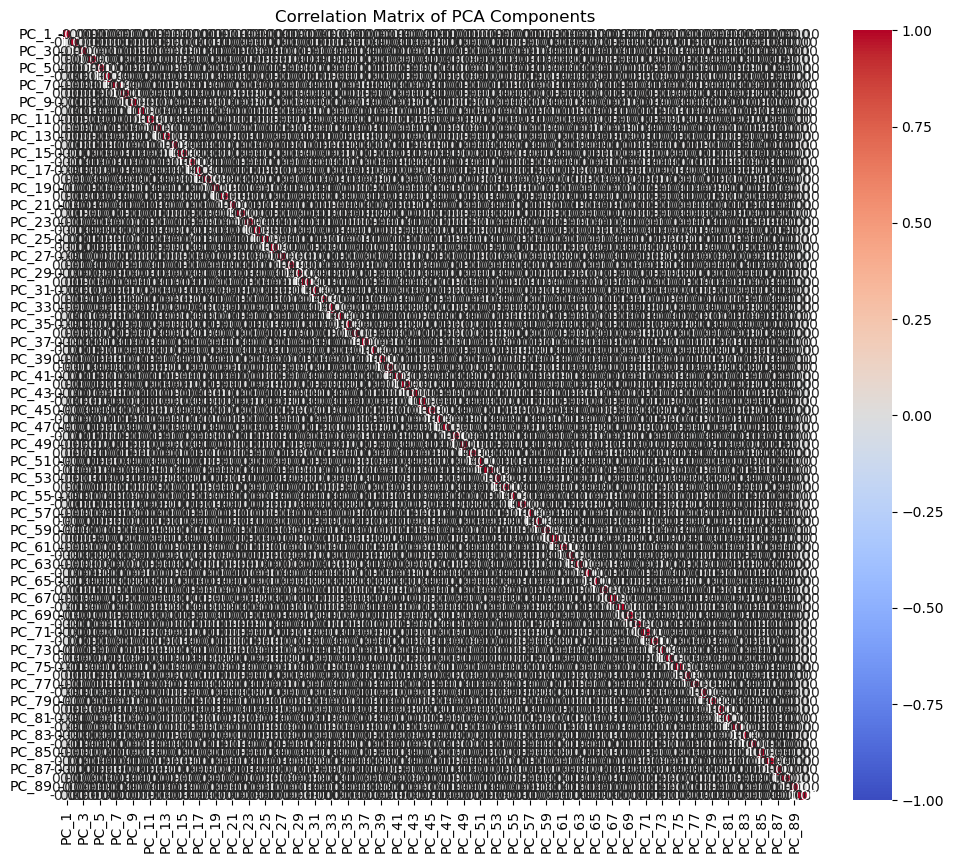

In [ ]:
# Correlation matrix for numerical features (PCA components)
corr_matrix = processed_data.drop(columns=['Label']).corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", vmax=1, vmin=-1, center=0)
plt.title("Correlation Matrix of PCA Components")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract features and target label
X = processed_data.drop(columns=["Label"])
y = processed_data["Label"]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())


       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0  2.534059  2.167654  0.578627  0.435138 -1.965241 -0.228175 -3.406928   
1 -0.775712 -0.295130 -0.841738  0.144885  0.284514 -0.604434 -0.257590   
2  0.419953 -0.542495 -0.720043  0.646153 -0.597375  0.515689  0.274319   
3  0.049752 -2.613501  4.975688 -0.749946  1.703816 -1.024065  0.138859   
4 -0.359993  0.805506 -0.481449  1.019672  0.344970 -0.595429  0.078028   

       PC_8      PC_9     PC_10  ...     PC_81     PC_82     PC_83     PC_84  \
0 -0.236866 -0.188546  2.347395  ...  1.693080 -1.730952  0.033674  0.809381   
1 -0.469225 -0.757178  0.180436  ... -0.794486 -0.425874  0.383873  0.729197   
2 -1.860413 -0.285712 -0.441089  ... -1.917807 -0.108995 -1.149425 -0.027493   
3 -2.850318 -0.891544 -0.120926  ...  0.182284 -0.894484  1.477584 -0.609460   
4 -0.331851  0.881961  0.234929  ...  0.435312 -0.282924 -0.670000 -0.285862   

      PC_85     PC_86     PC_87     PC_88     PC_89     PC_90  
0 -1

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (14304, 90)
Testing data shape: (3576, 90)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store models and their accuracy
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    # Print classification report
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Display accuracy of all models
print("\nModel Accuracy Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")



Logistic Regression Classification Report:

              precision    recall  f1-score   support

        fake       0.90      0.89      0.89      1826
        real       0.88      0.90      0.89      1750

    accuracy                           0.89      3576
   macro avg       0.89      0.89      0.89      3576
weighted avg       0.89      0.89      0.89      3576


Support Vector Machine Classification Report:

              precision    recall  f1-score   support

        fake       0.98      0.97      0.97      1826
        real       0.97      0.98      0.97      1750

    accuracy                           0.97      3576
   macro avg       0.97      0.97      0.97      3576
weighted avg       0.97      0.97      0.97      3576


Random Forest Classification Report:

              precision    recall  f1-score   support

        fake       0.95      0.94      0.95      1826
        real       0.94      0.95      0.94      1750

    accuracy                           0.94      3

2025-02-21 10:11:45.303642: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
358/358 [==============================] - 4s 8ms/step - loss: 0.3960 - accuracy: 0.8416 - val_loss: 0.2548 - val_accuracy: 0.9007
Epoch 2/50
358/358 [==============================] - 3s 8ms/step - loss: 0.1404 - accuracy: 0.9478 - val_loss: 0.1502 - val_accuracy: 0.9402
Epoch 3/50
358/358 [==============================] - 2s 7ms/step - loss: 0.0746 - accuracy: 0.9736 - val_loss: 0.1472 - val_accuracy: 0.9514
Epoch 4/50
358/358 [==============================] - 2s 7ms/step - loss: 0.0528 - accuracy: 0.9819 - val_loss: 0.1495 - val_accuracy: 0.9518
Epoch 5/50
358/358 [==============================] - 3s 7ms/step - loss: 0.0372 - accuracy: 0.9873 - val_loss: 0.1517 - val_accuracy: 0.9528
Epoch 6/50
358/358 [==============================] - 4s 12ms/step - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.1832 - val_accuracy: 0.9469
Epoch 7/50
358/358 [==============================] - 3s 7ms/step - loss: 0.0326 - accuracy: 0.9872 - val_loss: 0.1470 - val_accuracy: 0.9591
Epoch

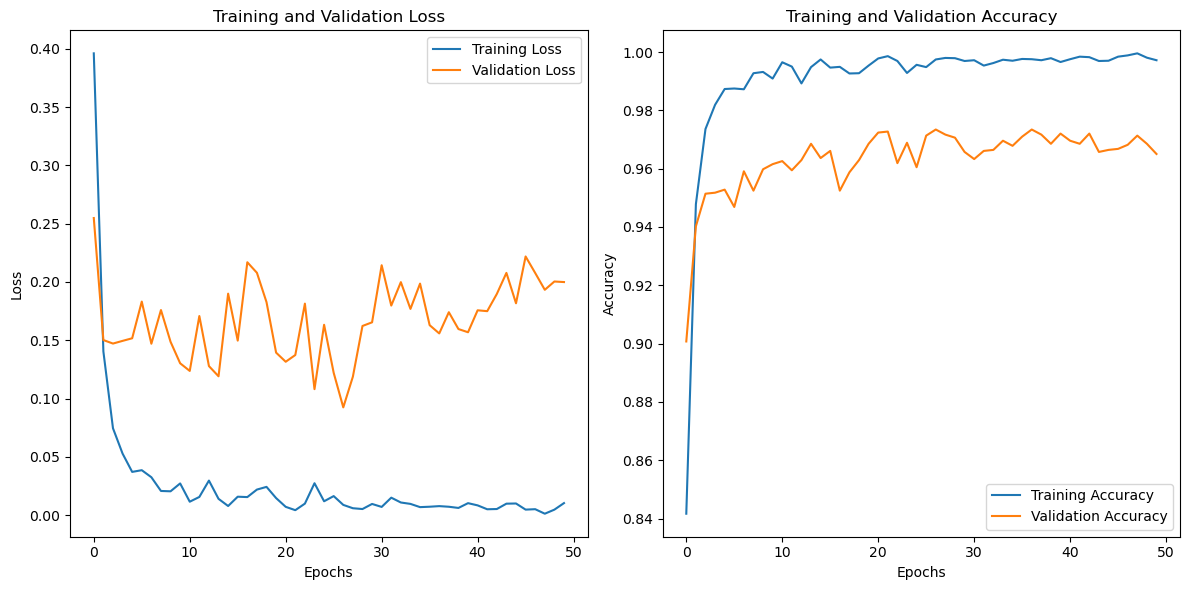

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Initialize label encoder
label_encoder = LabelEncoder()

# Reshape input for CNN (assuming 1D features are used)
X_train_cnn = np.expand_dims(X_train.values, axis=2)
X_test_cnn = np.expand_dims(X_test.values, axis=2)

# Encode labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_cnn = to_categorical(y_train_encoded)
y_test_cnn = to_categorical(y_test_encoded)

# Define an improved CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(y_train_cnn.shape[1], activation='softmax')
])

# Compile the model with an adaptive learning rate
cnn_model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with an increased batch size and validation split
history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 6: Plot Training Loss and Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


112/112 [==============================] - 0s 2ms/step


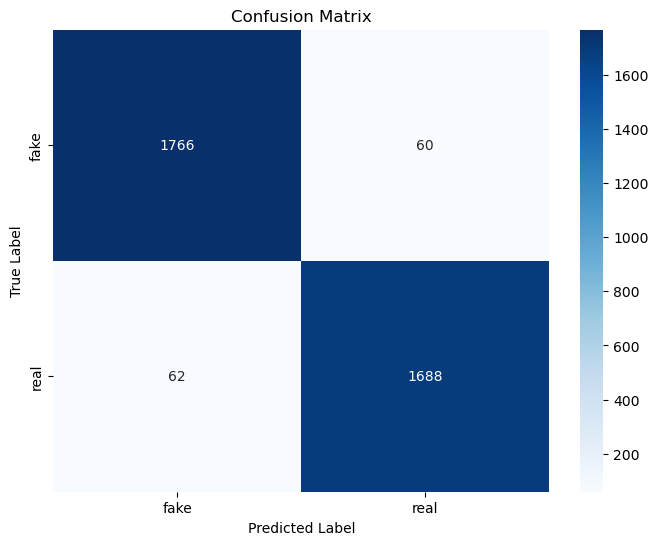

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1826
           1       0.97      0.96      0.97      1750

    accuracy                           0.97      3576
   macro avg       0.97      0.97      0.97      3576
weighted avg       0.97      0.97      0.97      3576



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get predictions on the test set
y_pred = cnn_model.predict(X_test_cnn)  # Model predictions

# Step 2: Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class labels
y_true_classes = np.argmax(y_test_cnn, axis=1)  # True class labels

# Step 3: Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Clssification Report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 10}
Best Score: 0.978677194877824


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier()
}

# Stratified K-Fold for balanced label distribution in splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each model
cv_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y_encoded, cv=skf, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"{model_name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")


Logistic Regression: Mean Accuracy = 0.8875, Std = 0.0050
Support Vector Machine: Mean Accuracy = 0.9760, Std = 0.0005
Random Forest: Mean Accuracy = 0.9482, Std = 0.0052
Gradient Boosting: Mean Accuracy = 0.9112, Std = 0.0033
k-Nearest Neighbors: Mean Accuracy = 0.9372, Std = 0.0032
